In [33]:
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import quad
from math import log10
import matplotlib.pyplot as pl
from matplotlib.ticker import MaxNLocator
import getdist
import multiprocessing

# Probe function X(z)
$$
X(z) = 1 + (4X_1-X_2-3)\frac{z}{z_m} - 2(2X_1-X_2-1)\left( \frac{z}{z_m} \right)^2
$$

In [4]:

zm = max(z_pp)

def Xdz(z, w0, w1):
    t1 = z*(4.0*w0-w1-3.0)/zm
    t2 = 2.0*z*z*(2.0*w0 - w1 - 1.0)/(zm*zm)
    return 1.0 + t1 - t2

def Ez(z, om, w0, w1):
    z1 = 1.0 + z
    Xm = om*(z1**3.0)
    return np.sqrt(Xm + (1.-om)*Xdz(z, w0, w1))

def f(z, om, w0, w1):
    return 1.0/Ez(z, om, w0, w1)

def rr(z, om, w0, w1):
    return quad(lambda x:f(x, om, w0, w1),0,z,)[0]

def dlh(z, om, w0, w1): #distancia lumínica
    ans = (1.0 + z)*rr(z, om, w0, w1)
    return ans

def q(z, om, w0, wa):
    mod1 = (1+z)
    mod2 = np.exp((-3*wa*z)/mod1)
    num = (3*(mod1**2))*(mod2*wa*((mod1)**(3*(w0+wa)))*(-1+om)-mod2*(1+w0+wa)*(mod1**(1+3*w0+3*wa))*(-1+om)+mod1*om)
    dem = 2*(mod2*(mod1**(3*(1+w0+wa)))*(1-om)+(mod1**3)*om)
    return -1 + num/dem

z = np.linspace(0,2.3,100)

# Reconstructing X(z) and q(z)

In [34]:
h0_f = 72.24   
om0_f = 0.335
w0_f = 0.43
wa_f = -1.72
M_f = -19.28 

som0_f = 0.01
sw0_f = 0.14
swa_f = 0.6


In [35]:
ddm = Xdz(z, w0_f, wa_f)     # X(z) for each data set used

In [36]:
# To compute the propagation of errors

def DXw0(z, w0, wa):
    xexp = np.exp((-3.0*wa*z)/(1.0 + z))
    xr = (1.0 + z)**(3.0*(1.0 + w0 + wa))
    rs = 3.0*xexp*xr*np.log(1 + z)
    return rs

def DXwa(z, w0, wa):
    xexp = np.exp((-3.0*wa*z)/(1.0 + z))
    xr = (1.0 + z)**(3.0*(1.0 + w0 + wa))
    rs1 = -3.0*xexp*xr*z/(1 + z)
    rs2 = 3.0*xexp*xr*np.log(1 + z)
    return rs1+rs2

def errf(z, w0, wa, sw0, swa):
    t1 = DXw0(z, w0, wa)*sw0
    t2 = DXwa(z, w0, wa)*swa
    rst = t1**2 + t2**2
    return np.sqrt(rst)

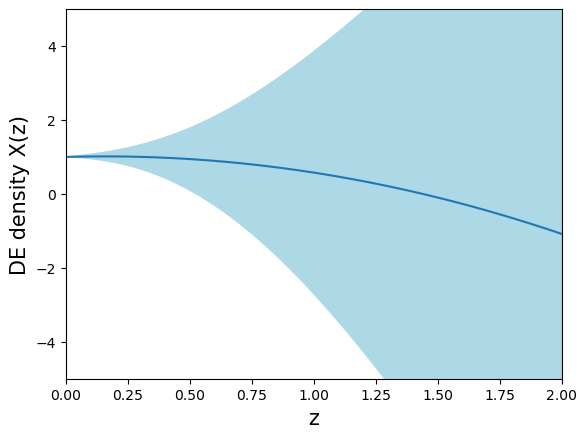

In [37]:
sddm = errf(z, w0_f, wa_f, sw0_f, swa_f)

pl.plot(z, ddm, '-')
pl.fill_between(z, ddm-sddm, ddm+sddm, color = 'lightblue')
pl.axis([0, 2, -5, 5])
pl.xlabel('z', fontsize=15)
pl.ylabel('DE density X(z)', fontsize = 15)
pl.show()

In [38]:
# Error propagation for q(z)

def Dqzom(z, om, w0, wa):
    xexp = np.exp((3.0*wa*z)/(1.0 + z))
    xr = (1.0 + z)**(3.0*(w0 + wa))
    t1 = 3.*xexp*xr*(w0+w0*z+wa*z)/(1.+z)
    t2 = 2.*(xexp*om-(-1+om)*xr)**2
    return -t1/t2

def Dqzw0(z, om, w0, wa):
    xexp = np.exp((3.0*wa*z)/(1.0 + z))
    xr = (1.0 + z)**(3.0*(w0 + wa))
    t1 = 3.*(-1.+ om)*xr/(1.+z)
    t2 = (1.+z)*(-xexp*om+(-1.+om)*xr)
    t3 = 3.*xexp*om*(w0+w0*z+wa*z)*np.log(1.+z)
    t4 = 2.*(xexp*om - (-1+om)*xr)**2
    return (t1*(t2-t3))/t4

def Dqzwa(z, om, w0, wa):
    xexp = np.exp((3.0*wa*z)/(1.0 + z))
    xr = (1.0 + z)**(3.0*(w0 + wa))
    t1 = 3.*(-1.+ om)*xr/(1.+z)**2
    t2 = (-1.+om)*z*xr*(1.+z)
    t3 = xexp*om*z*(-1.+(-1.+3.*wa)*z+3.*w0*(1.+z))
    t4 = 3.*xexp*om*(1.+z)*(w0+w0*z+wa*z)*np.log(1.+z)
    t5 = 2.*(xexp*om - (-1+om)*xr)**2
    return (t1*(t2+t3-t4))/t5

def errqf(z, om, w0, wa, som, sw0, swa):
    t1 = Dqzom(z, om, w0, wa)*som
    t2 = Dqzw0(z, om, w0, wa)*sw0
    t3 = Dqzwa(z, om, w0, wa)*swa
    rst = t1**2 + t2**2 + t2**2
    return sqrt(rst)

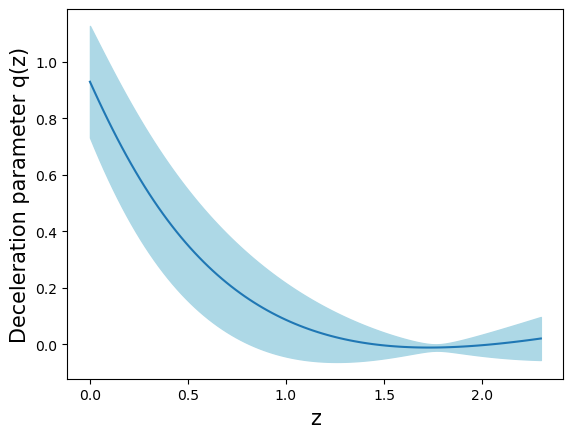

In [39]:
# We plot the results of both dataset

ddm = q(z, om0_f, w0_f, wa_f)

sddm = errqf(z, om0_f, w0_f, wa_f, som0_f, sw0_f, swa_f)

pl.plot(z, ddm, '-')
pl.fill_between(z, ddm-sddm, ddm+sddm, color = 'lightblue')

pl.xlabel('z', fontsize=15)
pl.ylabel('Deceleration parameter q(z)', fontsize = 15)
pl.show()
